In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from subprocess import check_output
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#Loading the dataset
data = pd.read_excel('Book2.xlsx')
datadata = shuffle(data)

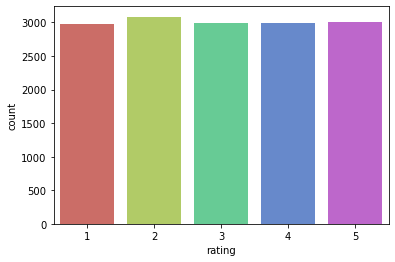

<Figure size 432x288 with 0 Axes>

In [3]:
sns.countplot(x='rating',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [4]:
X = data["review_comment"]
Y = data["rating"]

In [5]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,                  # predictors
                                                    Y,                  # labels
                                                    test_size=1/3,      # test set size 
                                                    random_state=0)     # set random number generator seed for reproducibility 

print(X_train.shape)
print(X_test.shape)

(10034,)
(5017,)


In [6]:
# Setup pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf', TfidfVectorizer()), 
                 ('clf', SVC(random_state=42))])

In [7]:
# Fit pipeline on train set
pipe.fit(X_train, y_train)
 
# Performance on train and test sets
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.9646202910105641
Test set score: 0.5449471795893961


In [8]:
y_pred1 = pipe.predict(X_test)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.62      0.61      0.61       972
           2       0.43      0.49      0.46      1021
           3       0.43      0.41      0.42       995
           4       0.54      0.49      0.51      1040
           5       0.72      0.73      0.73       989

    accuracy                           0.54      5017
   macro avg       0.55      0.55      0.55      5017
weighted avg       0.55      0.54      0.54      5017



In [11]:
>>> docs_new = ['Very unhappy with the place']

>>> predict_new = pipe.predict(docs_new)

>>> for doc, category in zip(docs_new, predict_new):
...     print('%r => %s' % (doc, predict_new))

'Very unhappy with the place' => [5]
